In [247]:
pip install --upgrade matplotlib seaborn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 1.5 MB/s eta 0:00:06
    --------------------------------------- 0.1/8.0 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.7/8.0 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.0 MB 8.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/8.0 MB 11.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/8.0 MB 13.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.0 MB 14.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.3/8.

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\users\\maria\\appdata\\local\\programs\\python\\python312\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [264]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Evaluar las hipotesis de las relaciones entre las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest,chi2_contingency,ttest_ind
from scipy.stats import mannwhitneyu

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Transformación Fichero

In [185]:
df=pd.read_csv("df_transformado_limpio.csv",index_col=0)

In [186]:
df.head()

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1620,51,No,travel rarely,684.0,6,3,life sciences,1,Male,51,3,5,research director,3,married,195370.0,6462,7,No,13,3.0,3,0,10.0,5,3.0,20,15,15,1972,Yes
2590,52,No,travel rarely,699.0,1,4,life sciences,3,Male,65,2,5,manager,3,married,199990.0,5678,0,No,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes
3190,42,No,travel rarely,532.0,4,2,technical degree,3,Male,58,3,5,manager,4,married,192320.0,4933,1,No,11,3.0,4,0,22.0,3,2.8,22,11,15,1981,Yes
20681,47,No,travel rarely,359.0,2,4,medical,1,Female,82,3,4,research director,3,married,171690.0,26703,3,No,19,3.0,2,2,10.0,2,2.8,20,5,6,1976,No
19000,48,No,travel rarely,117.0,22,3,medical,4,Female,58,3,4,manager,4,married,171740.0,2437,3,No,11,3.0,2,1,10.0,3,3.0,22,4,7,1975,Yes


In [187]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'remotework'],
      dtype='object')

In [188]:
def categorizar_grupos(numero):
    if numero >= 3:
        return "grupo A"
    else:
        return "grupo B"
    

df["gruposatisfaccion"]= df["jobsatisfaction"].apply(categorizar_grupos)

In [189]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'remotework', 'gruposatisfaccion'],
      dtype='object')

In [190]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'remotework', 'gruposatisfaccion'],
      dtype='object')

In [191]:
def asignar_grupos(valor):
    if valor >= 3:
        return "Group A"
    else:
        return "Group B"

df['jobsatisfaction2'] = df['jobsatisfaction'].map(asignar_grupos)
df['environmentsatisfaction2'] = df['environmentsatisfaction'].map(asignar_grupos)
df['worklifebalance2'] = df['worklifebalance'].map(asignar_grupos)



In [192]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'remotework', 'gruposatisfaccion', 'jobsatisfaction2',
       'environmentsatisfaction2', 'worklifebalance2'],
      dtype='object')

In [193]:
df['attrition'].value_counts()

attrition
No     903
Yes    177
Name: count, dtype: int64

In [194]:
porcentaje_Y = (df['attrition'].value_counts(normalize=True) * 100)['Yes']
porcentaje_N = (df['attrition'].value_counts(normalize=True) * 100)['No']
print(porcentaje_Y, porcentaje_N)

16.38888888888889 83.61111111111111


In [195]:
def porcentaje_ido(df, columnas):
    resultados = {}
    for columna in columnas:
        empleados_por_grupo = df.groupby(columna).size()
        empleados_idos_por_grupo = df[df['attrition'] == 'Yes'].groupby(columna).size()
        tasa_rotacion_por_grupo = (empleados_idos_por_grupo / empleados_por_grupo) * 100
        
        # Reemplazar NaN con 0 para grupos sin empleados que se han ido
        tasa_rotacion_por_grupo = tasa_rotacion_por_grupo.fillna(0)
        
        resultados[columna] = tasa_rotacion_por_grupo
    
    return pd.DataFrame(resultados)

# Calculamos la tasa de rotación
columnas = ['jobsatisfaction2', 'worklifebalance2', 'environmentsatisfaction2']
resultado_tasa_rotacion = porcentaje_ido(df, columnas)
print(resultado_tasa_rotacion)


         jobsatisfaction2  worklifebalance2  environmentsatisfaction2
Group A         14.135338         15.395284                 13.970588
Group B         20.000000         18.384401                 20.500000


In [196]:
df.head(5)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework,gruposatisfaccion,jobsatisfaction2,environmentsatisfaction2,worklifebalance2
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1620,51,No,travel rarely,684.0,6,3,life sciences,1,Male,51,3,5,research director,3,married,195370.0,6462,7,No,13,3.0,3,0,10.0,5,3.0,20,15,15,1972,Yes,grupo A,Group A,Group B,Group A
2590,52,No,travel rarely,699.0,1,4,life sciences,3,Male,65,2,5,manager,3,married,199990.0,5678,0,No,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes,grupo A,Group A,Group A,Group A
3190,42,No,travel rarely,532.0,4,2,technical degree,3,Male,58,3,5,manager,4,married,192320.0,4933,1,No,11,3.0,4,0,22.0,3,2.8,22,11,15,1981,Yes,grupo A,Group A,Group A,Group B
20681,47,No,travel rarely,359.0,2,4,medical,1,Female,82,3,4,research director,3,married,171690.0,26703,3,No,19,3.0,2,2,10.0,2,2.8,20,5,6,1976,No,grupo A,Group A,Group B,Group B
19000,48,No,travel rarely,117.0,22,3,medical,4,Female,58,3,4,manager,4,married,171740.0,2437,3,No,11,3.0,2,1,10.0,3,3.0,22,4,7,1975,Yes,grupo A,Group A,Group A,Group A


# Test A/B

## A) Test Parametricos

H0 - Hipótesis nula: No existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos no tienen una mayor probabilidad de dejar la empresa

H1 - Hipótesis alternativa : Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa

## 1. Shapiro- Wilks Normalidad

In [197]:
def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [198]:
# Convertir Y = 1 y N = 0
df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})

In [199]:
df.head()

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework,gruposatisfaccion,jobsatisfaction2,environmentsatisfaction2,worklifebalance2
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1620,51,0,travel rarely,684.0,6,3,life sciences,1,Male,51,3,5,research director,3,married,195370.0,6462,7,No,13,3.0,3,0,10.0,5,3.0,20,15,15,1972,Yes,grupo A,Group A,Group B,Group A
2590,52,0,travel rarely,699.0,1,4,life sciences,3,Male,65,2,5,manager,3,married,199990.0,5678,0,No,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes,grupo A,Group A,Group A,Group A
3190,42,0,travel rarely,532.0,4,2,technical degree,3,Male,58,3,5,manager,4,married,192320.0,4933,1,No,11,3.0,4,0,22.0,3,2.8,22,11,15,1981,Yes,grupo A,Group A,Group A,Group B
20681,47,0,travel rarely,359.0,2,4,medical,1,Female,82,3,4,research director,3,married,171690.0,26703,3,No,19,3.0,2,2,10.0,2,2.8,20,5,6,1976,No,grupo A,Group A,Group B,Group B
19000,48,0,travel rarely,117.0,22,3,medical,4,Female,58,3,4,manager,4,married,171740.0,2437,3,No,11,3.0,2,1,10.0,3,3.0,22,4,7,1975,Yes,grupo A,Group A,Group A,Group A


In [200]:
metricas = ['attrition']

for metrica in metricas:
    normalidad(df ,metrica)

Para la columna attrition los datos no siguen una distribución normal.


## 2. Prueba Z. Normalidad

In [201]:
# Función para realizar el test Z y evaluar las hipótesis
def test_z_grupo(df, columna_grupoA, columna_grupoB, nivel_significancia=0.05):
    # Obtener los datos de tasa de rotación para los grupos A y B
    tasa_grupoA = resultado_tasa_rotacion.loc[columna_grupoA]
    tasa_grupoB = resultado_tasa_rotacion.loc[columna_grupoB]
    
    # Calcular la estadística Z
    media_A = tasa_grupoA.mean()
    media_B = tasa_grupoB.mean()
    std_dev_A = tasa_grupoA.std()
    std_dev_B = tasa_grupoB.std()
    n_A = len(df[df[columnas[0]] == columna_grupoA])  # Número de observaciones en el grupo A
    n_B = len(df[df[columnas[0]] == columna_grupoB])  # Número de observaciones en el grupo B
    
    numerador = media_A - media_B
    denominador = math.sqrt((std_dev_A ** 2 / n_A) + (std_dev_B ** 2 / n_B))
    z_score = numerador / denominador
    
    # Calcular el p-valor (dos colas)
    p_valor = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    # Comprobar si rechazamos la hipótesis nula
    if p_valor < nivel_significancia:
        print(f"Con un nivel de significancia de {nivel_significancia}, rechazamos la hipótesis nula.")
        print(f"Estadística Z: {z_score}")
        print(f"P-valor: {p_valor}")
        print("Hay evidencia estadística suficiente para concluir que hay una diferencia significativa en la tasa de rotación entre los grupos.")
    else:
        print(f"Con un nivel de significancia de {nivel_significancia}, no rechazamos la hipótesis nula.")
        print(f"Estadística Z: {z_score}")
        print(f"P-valor: {p_valor}")
        print("No hay suficiente evidencia estadística para concluir que hay una diferencia significativa en la tasa de rotación entre los grupos.")



    

In [202]:
# test Z para comparar dos grupos
columna_grupoA = 'Group A'
columna_grupoB = 'Group B'

test_z_grupo(df, columna_grupoA, columna_grupoB)

Con un nivel de significancia de 0.05, rechazamos la hipótesis nula.
Estadística Z: -82.5387954718272
P-valor: 0.0
Hay evidencia estadística suficiente para concluir que hay una diferencia significativa en la tasa de rotación entre los grupos.


## 3. Levene. Homegenidad en las varianzas

In [203]:
def homogeneidad (dataframe, columna, columna_metrica):
     
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [204]:
metricas = ['attrition']

for metrica in metricas:
    homogeneidad(df ,"jobsatisfaction2", metrica)

Para la métrica attrition, las varianzas no son homogéneas entre grupos.


## B) TEST NO PARAMETRICOS

## 1. Chi- Cuadrado.


In [205]:
# La prueba de chi cuadrado también puede ser no paramétrica cuando se utiliza para evaluar la independencia entre variables categóricas en una tabla de contingencia
#Se puede utilizar la prueba de chi cuadrado para determinar si hay una relación significativa entre estas variables.

In [206]:
# Crear una tabla de contingencia entre las columnas 'jobsatisfaction2' y 'attrition'
tabla_contingencia = pd.crosstab(df['jobsatisfaction2'], df['attrition'])

# Realizar la prueba de chi cuadrado
chi2, p_valor, grados_libertad, _ = chi2_contingency(tabla_contingencia)

# Interpretar los resultados
nivel_significancia = 0.05
print(f"Estadística Chi-cuadrado: {chi2}")
print(f"P-valor: {p_valor}")
print(f"Grados de libertad: {grados_libertad}")

if p_valor < nivel_significancia:
    print(f"Con un nivel de significancia de {nivel_significancia}, rechazamos la hipótesis nula.")
    print("Hay evidencia estadística suficiente para concluir que hay una asociación entre satisfacción en el trabajo y la atrición.")
else:
    print(f"Con un nivel de significancia de {nivel_significancia}, no rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia estadística para concluir que hay una asociación entre satisfacción en el trabajo y la atrición.")

Estadística Chi-cuadrado: 5.992997986177432
P-valor: 0.014362771751750169
Grados de libertad: 1
Con un nivel de significancia de 0.05, rechazamos la hipótesis nula.
Hay evidencia estadística suficiente para concluir que hay una asociación entre satisfacción en el trabajo y la atrición.


## 2. Mann - Whitney.

In [209]:

# Función para realizar la Prueba de Mann-Whitney U
def prueba_mann_whitney(df, columna_variable):
    grupoA = df[df['jobsatisfaction2'] == "Group A"][columna_variable]
    grupoB = df[df['jobsatisfaction2'] == "Group B"][columna_variable]
    
    U, p_valor = mannwhitneyu(grupoA, grupoB, alternative='two-sided')  # Alternativa de dos colas
    
    if p_valor < 0.05:
        print(f"Con un nivel de significancia de 0.05, rechazamos la hipótesis nula.")
        print(f"Estadística U de Mann-Whitney: {U}")
        print(f"P-valor: {p_valor}")
        print("Hay evidencia estadística suficiente para concluir que hay una diferencia significativa.")
    else:
        print(f"Con un nivel de significancia de 0.05, no rechazamos la hipótesis nula.")
        print(f"Estadística U de Mann-Whitney: {U}")
        print(f"P-valor: {p_valor}")
        print("No hay suficiente evidencia estadística para concluir que hay una diferencia significativa.")



In [210]:
columna_variable = 'attrition'

prueba_mann_whitney(df, columna_variable)


Con un nivel de significancia de 0.05, rechazamos la hipótesis nula.
Estadística U de Mann-Whitney: 129895.0
P-valor: 0.011366403739309406
Hay evidencia estadística suficiente para concluir que hay una diferencia significativa.


In [213]:
# Estos valores sugieren que hay una asociación estadísticamente significativa entre las variables "satisfacción en el trabajo" (jobsatisfaction2) y "atrición" (attrition)

In [208]:
#¡Rechazamos la hipótesis nula! Es decir Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empres

# Analisis Gráfico

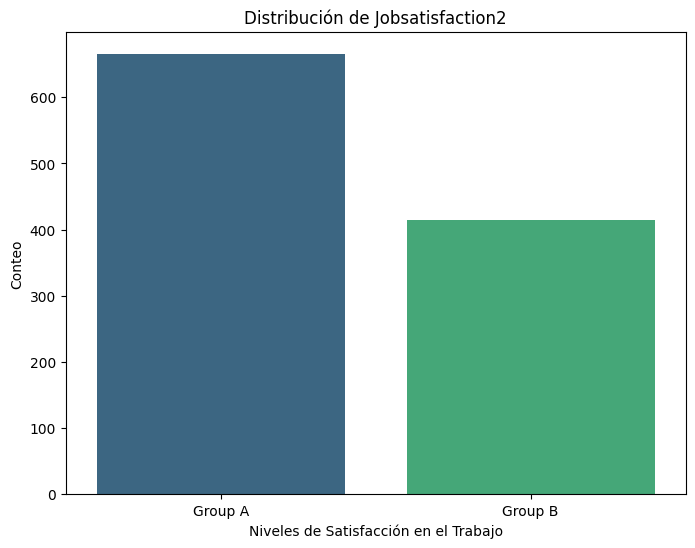

In [221]:

# Crear el gráfico de barras para jobsatisfaction2
plt.figure(figsize=(8, 6))
sns.countplot(x='jobsatisfaction2', data=df, palette='viridis')
plt.title('Distribución de Jobsatisfaction2')
plt.xlabel('Niveles de Satisfacción en el Trabajo')
plt.ylabel('Conteo')
plt.show()

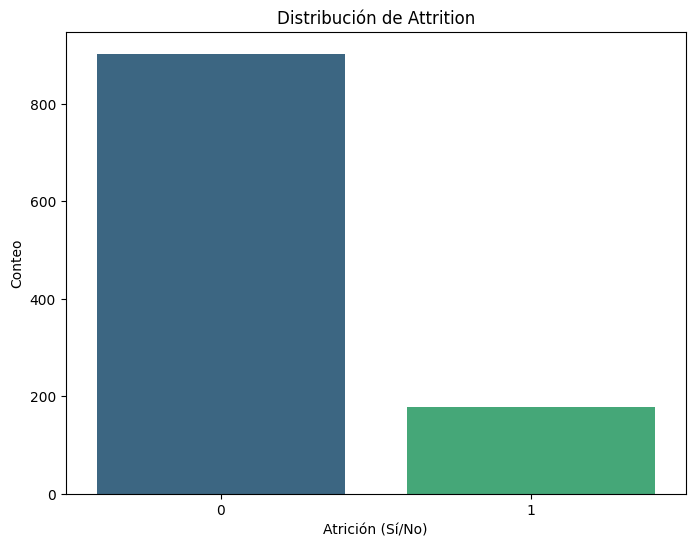

In [215]:
# Crear el gráfico de barras para attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='attrition', data=df, palette='viridis')
plt.title('Distribución de Attrition')
plt.xlabel('Atrición (Sí/No)')
plt.ylabel('Conteo')
plt.show()

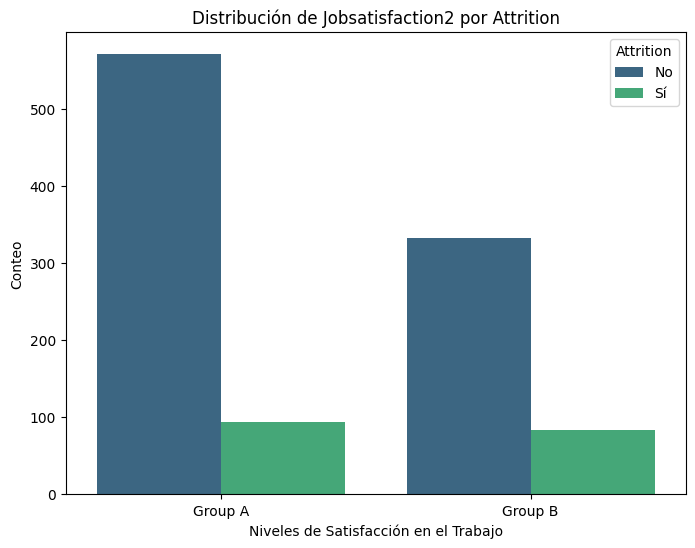

In [225]:
# Gráfico de barras apiladas para jobsatisfaction2 y attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='jobsatisfaction2', hue='attrition', data=df, palette='viridis')
plt.title('Distribución de Jobsatisfaction2 por Attrition')
plt.xlabel('Niveles de Satisfacción en el Trabajo')
plt.ylabel('Conteo')
plt.legend(title='Attrition', labels=['No', 'Sí'])
plt.show()

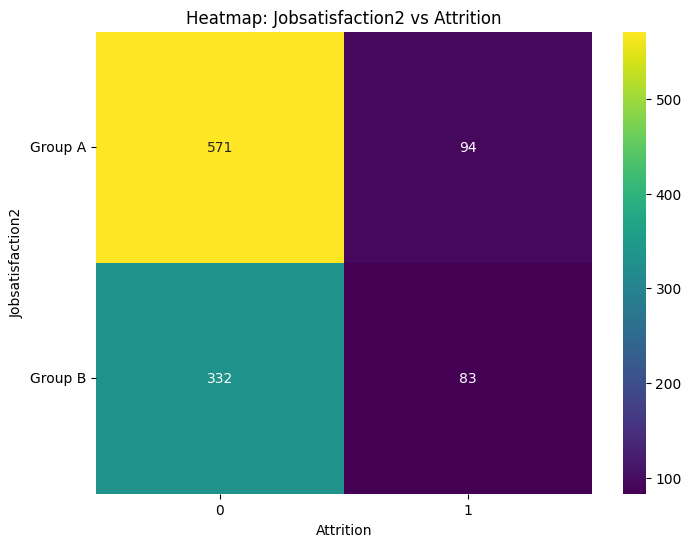

In [222]:

# Crear una tabla de contingencia entre jobsatisfaction2 y attrition
tabla_contingencia = pd.crosstab(df['jobsatisfaction2'], df['attrition'])

# Crear el heatmap usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Heatmap: Jobsatisfaction2 vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jobsatisfaction2')
plt.yticks(rotation=0)  # Rotar etiquetas del eje y para mejor visualización
plt.show()

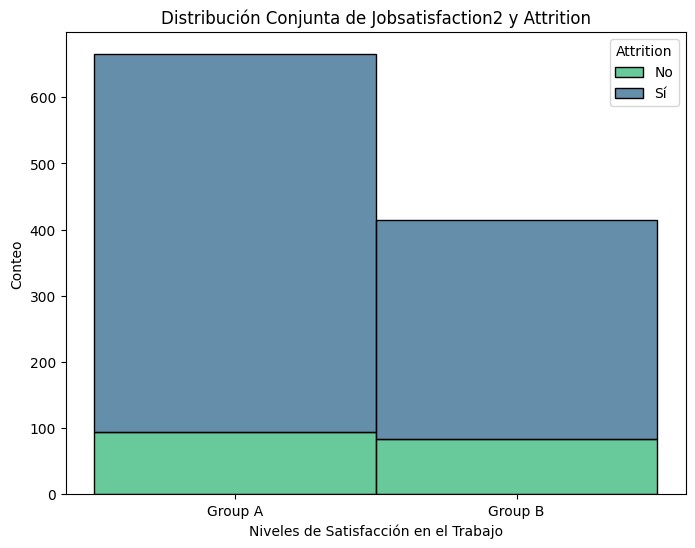

In [228]:
# Gráfico de conteo conjunto (jointplot)
plt.figure(figsize=(8, 6))
sns.histplot(x='jobsatisfaction2', hue='attrition', data=df, multiple='stack', palette='viridis')
plt.title('Distribución Conjunta de Jobsatisfaction2 y Attrition')
plt.xlabel('Niveles de Satisfacción en el Trabajo')
plt.ylabel('Conteo')
plt.legend(title='Attrition', labels=['No', 'Sí'])
plt.show()

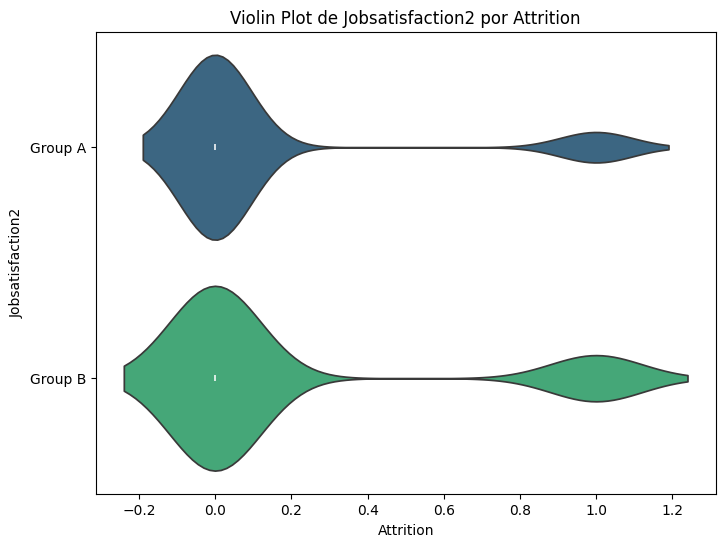

In [235]:
# Violin plot de jobsatisfaction2 por attrition
plt.figure(figsize=(8, 6))
sns.violinplot(x='attrition', y='jobsatisfaction2', data=df, palette='viridis')
plt.title('Violin Plot de Jobsatisfaction2 por Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jobsatisfaction2')
plt.show()


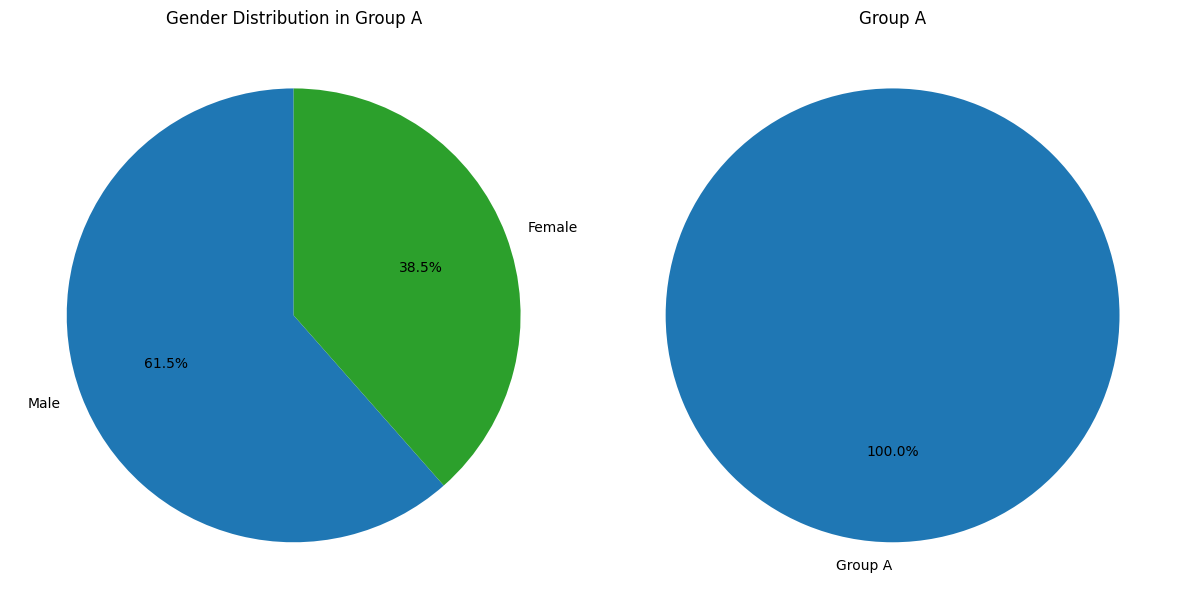

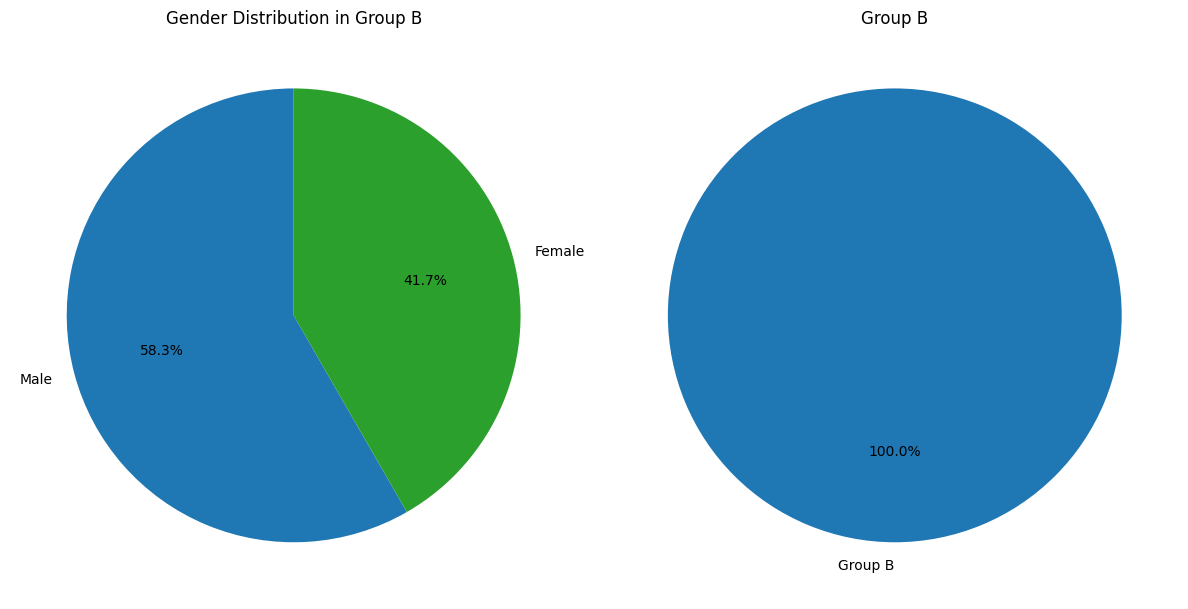

In [275]:
import matplotlib.pyplot as plt

# Filtrar datos por Group A y Group B
df_group_a = df[df['jobsatisfaction2'] == 'Group A']
df_group_b = df[df['jobsatisfaction2'] == 'Group B']

# Función para crear gráfico de pastel
def pie_chart(data, group_name):
    gender_counts = data['gender'].value_counts()
    satisfaction_counts = data['jobsatisfaction2'].value_counts()

    # Configuración del gráfico de pastel
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Paleta de colores azules y verdes
    colors = ['#1f77b4', '#2ca02c']  # Azul y verde

    # Pie chart para género
    ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.set_title(f'Gender Distribution in {group_name}')
    
    # Pie chart para satisfacción en el trabajo
    ax2.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax2.set_title(f'{group_name}')

    plt.tight_layout()
    plt.show()

# Crear gráficos de pastel para Group A y Group B
pie_chart(df_group_a, 'Group A')
pie_chart(df_group_b, 'Group B')


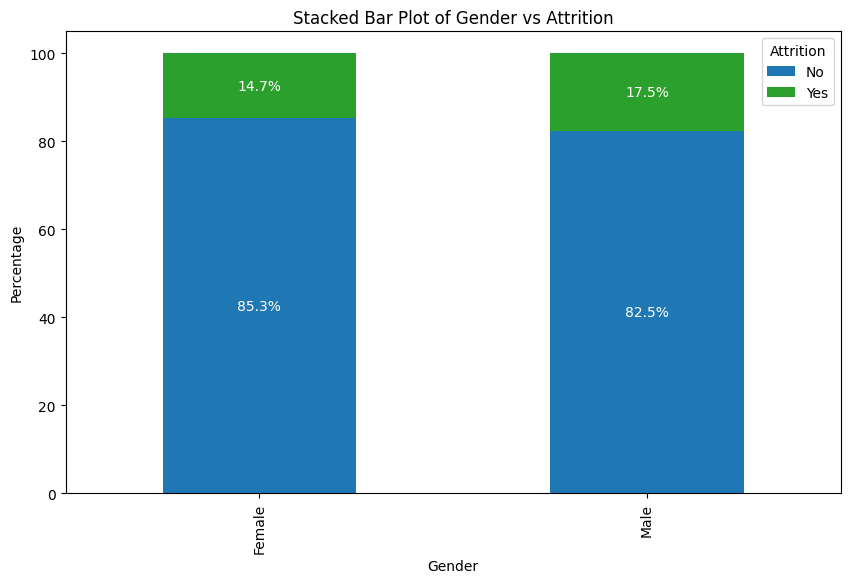

In [277]:
import matplotlib.pyplot as plt

# Crear una tabla de contingencia entre gender y attrition
contingency_table = pd.crosstab(df['gender'], df['attrition'], normalize='index') * 100
# Paleta de colores azules y verdes
colors = ['#1f77b4', '#2ca02c']  # Azul y verde

# Crear el gráfico de barras apiladas
ax = contingency_table.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Añadir los porcentajes de las etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

# Añadir título y etiquetas a los ejes
plt.title('Stacked Bar Plot of Gender vs Attrition')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Mostrar la leyenda
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])

# Mostrar el gráfico
plt.show()


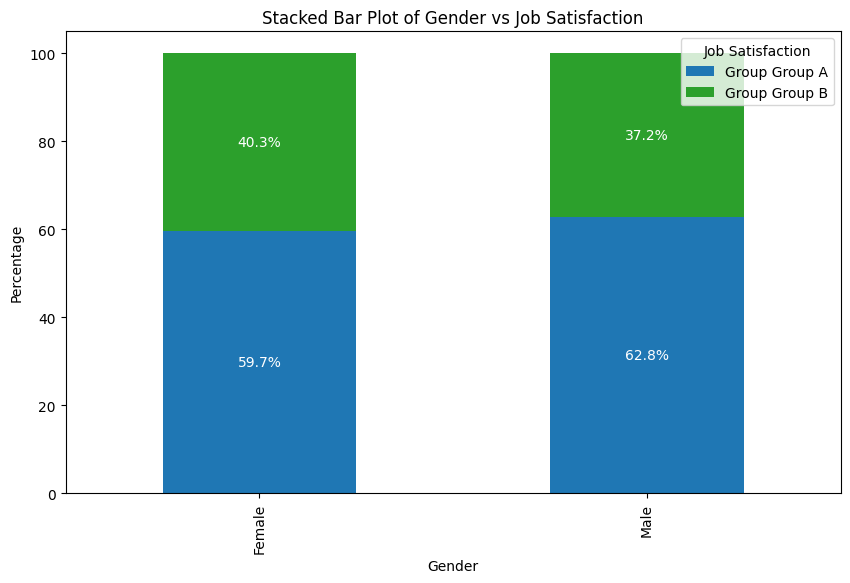

In [278]:
import matplotlib.pyplot as plt

# Crear una tabla de contingencia entre gender y jobsatisfaction2
contingency_table = pd.crosstab(df['gender'], df['jobsatisfaction2'], normalize='index') * 100

# Configurar colores para las barras
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']
# Crear el gráfico de barras apiladas
ax = contingency_table.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Añadir los porcentajes de las etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

# Añadir título y etiquetas a los ejes
plt.title('Stacked Bar Plot of Gender vs Job Satisfaction')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Mostrar la leyenda
plt.legend(title='Job Satisfaction', loc='upper right', labels=contingency_table.columns.map(lambda x: f'Group {x}'))

# Mostrar el gráfico
plt.show()
